<a href="https://colab.research.google.com/github/abidshafee/DataScienceYouTubeTutorials/blob/master/hierarchical_Clustering.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Clustering
The most basic unsupervised way to model any given data set is to assume that it's made up of distinct groups of object that share properties. Recognizing different properties in dataset by creating categories is called clustering. This way machine can detect certain objects are more similar to each other than others.

# Importing Required Libraries 

In [46]:
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt
from scipy.cluster.hierarchy import dendrogram, linkage
from matplotlib import style
style.use('ggplot')

### Uploading Dataset

In [47]:
from google.colab import files
file = files.upload()

Saving datasets_Iris.csv to datasets_Iris.csv


### Importing the Dataset to pandas data frame

In [48]:
df = pd.read_csv('datasets_Iris.csv')

In [49]:
df

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...,...
145,146,6.7,3.0,5.2,2.3,Iris-virginica
146,147,6.3,2.5,5.0,1.9,Iris-virginica
147,148,6.5,3.0,5.2,2.0,Iris-virginica
148,149,6.2,3.4,5.4,2.3,Iris-virginica


As we can see that *Iris dataset* is a four dimentional data set. Because it has four features: **SepalLength, SepalWidth, PetalLength, PetalWidth**

### Starting with Conventional Data Cleaning Procedure 
 - Removing Empty cells
 - Get rid of outliars
 - Replacing wrong entries

In [50]:
df.isna().sum()

Id               0
SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
Species          0
dtype: int64

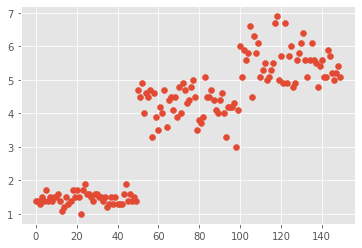

In [51]:
plt.scatter(df.index, df['PetalLengthCm'])

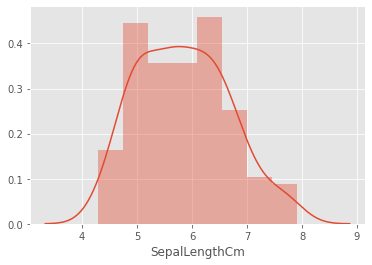

In [52]:
sns.distplot(df['SepalLengthCm'])

In [ ]:
sns.distplot(df['SepalWidthCm'])

In [ ]:
plt.scatter(df.index, df['PetalWidthCm'])

As we can see from scatter plot and distribution plot that there is no outliars in the dataset.

In [ ]:
df.info()

In [ ]:
len(df)

### Graphing 2D scatter plot

Text(0, 0.5, 'Width')

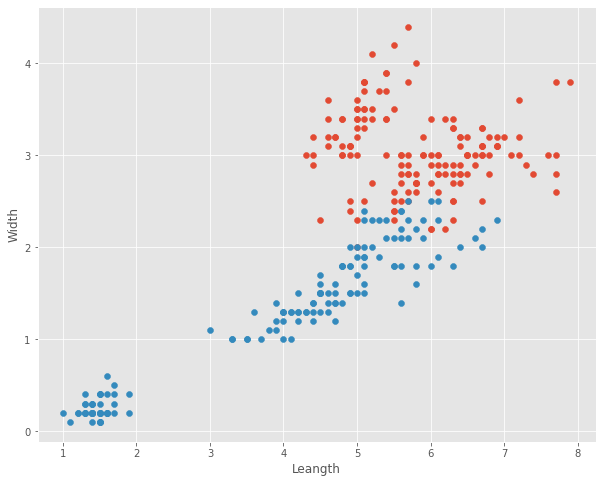

In [ ]:
plt.figure(figsize=(10, 8))
# SepalLeangth, SepalWidth
plt.scatter(df.iloc[:,1], df.iloc[:,2])
# petalLength, petalWidth
plt.scatter(df.iloc[:,3], df.iloc[:,4])
plt.xlabel('Leangth')
plt.ylabel('Width')

## PCA - Dimentionality Reduction
our iris dataset has 4 features -
**SepalLength, SepalWidth, PetalLength, PetalWidth**
which means it is a 4 Dimentional dataset. So we will reduce the dimention to 2D, so that we can plot a 2d graph og the dataset.

In [ ]:
from sklearn.preprocessing import scale
from sklearn.decomposition import PCA

### Converting dataframe to numpy array

In [ ]:
dfArray = df.iloc[:, 1:5].values

In [ ]:
dfArray

array([[5.1, 3.5, 1.4, 0.2],
       [4.9, 3. , 1.4, 0.2],
       [4.7, 3.2, 1.3, 0.2],
       [4.6, 3.1, 1.5, 0.2],
       [5. , 3.6, 1.4, 0.2],
       [5.4, 3.9, 1.7, 0.4],
       [4.6, 3.4, 1.4, 0.3],
       [5. , 3.4, 1.5, 0.2],
       [4.4, 2.9, 1.4, 0.2],
       [4.9, 3.1, 1.5, 0.1],
       [5.4, 3.7, 1.5, 0.2],
       [4.8, 3.4, 1.6, 0.2],
       [4.8, 3. , 1.4, 0.1],
       [4.3, 3. , 1.1, 0.1],
       [5.8, 4. , 1.2, 0.2],
       [5.7, 4.4, 1.5, 0.4],
       [5.4, 3.9, 1.3, 0.4],
       [5.1, 3.5, 1.4, 0.3],
       [5.7, 3.8, 1.7, 0.3],
       [5.1, 3.8, 1.5, 0.3],
       [5.4, 3.4, 1.7, 0.2],
       [5.1, 3.7, 1.5, 0.4],
       [4.6, 3.6, 1. , 0.2],
       [5.1, 3.3, 1.7, 0.5],
       [4.8, 3.4, 1.9, 0.2],
       [5. , 3. , 1.6, 0.2],
       [5. , 3.4, 1.6, 0.4],
       [5.2, 3.5, 1.5, 0.2],
       [5.2, 3.4, 1.4, 0.2],
       [4.7, 3.2, 1.6, 0.2],
       [4.8, 3.1, 1.6, 0.2],
       [5.4, 3.4, 1.5, 0.4],
       [5.2, 4.1, 1.5, 0.1],
       [5.5, 4.2, 1.4, 0.2],
       [4.9, 3

In [ ]:
dfArray.shape

(150, 4)

In [ ]:
scaledDf = scale(dfArray)

In [ ]:
scaledDf

array([[-9.00681170e-01,  1.03205722e+00, -1.34127240e+00,
        -1.31297673e+00],
       [-1.14301691e+00, -1.24957601e-01, -1.34127240e+00,
        -1.31297673e+00],
       [-1.38535265e+00,  3.37848329e-01, -1.39813811e+00,
        -1.31297673e+00],
       [-1.50652052e+00,  1.06445364e-01, -1.28440670e+00,
        -1.31297673e+00],
       [-1.02184904e+00,  1.26346019e+00, -1.34127240e+00,
        -1.31297673e+00],
       [-5.37177559e-01,  1.95766909e+00, -1.17067529e+00,
        -1.05003079e+00],
       [-1.50652052e+00,  8.00654259e-01, -1.34127240e+00,
        -1.18150376e+00],
       [-1.02184904e+00,  8.00654259e-01, -1.28440670e+00,
        -1.31297673e+00],
       [-1.74885626e+00, -3.56360566e-01, -1.34127240e+00,
        -1.31297673e+00],
       [-1.14301691e+00,  1.06445364e-01, -1.28440670e+00,
        -1.44444970e+00],
       [-5.37177559e-01,  1.49486315e+00, -1.28440670e+00,
        -1.31297673e+00],
       [-1.26418478e+00,  8.00654259e-01, -1.22754100e+00,
      

In [ ]:
pca = PCA()
pca.fit(scaledDf)
print(pca.explained_variance_ratio_)

[0.72770452 0.23030523 0.03683832 0.00515193]


In [ ]:
pca2 = PCA(n_components=2)
pca2.fit(scaledDf)

PCA(copy=True, iterated_power='auto', n_components=2, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False)

In [ ]:
print(pca2.explained_variance_ratio_)

[0.72770452 0.23030523]


In [ ]:
pca.components_

array([[ 0.52237162, -0.26335492,  0.58125401,  0.56561105],
       [ 0.37231836,  0.92555649,  0.02109478,  0.06541577],
       [-0.72101681,  0.24203288,  0.14089226,  0.6338014 ],
       [-0.26199559,  0.12413481,  0.80115427, -0.52354627]])

In [ ]:
pca2.components_

array([[ 0.52237162, -0.26335492,  0.58125401,  0.56561105],
       [ 0.37231836,  0.92555649,  0.02109478,  0.06541577]])

In [ ]:
print(pca2)

PCA(copy=True, iterated_power='auto', n_components=2, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False)


In [ ]:
pca.get_covariance

<bound method _BasePCA.get_covariance of PCA(copy=True, iterated_power='auto', n_components=None, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False)>

## Hierarchcal Clustering

### Separating Numerical Columns in new data frame

In [ ]:
df2 = df[df.columns[1:5]]

Making the categorical column as the index column of new dataframe

In [ ]:
df2.index=df[df.columns[5]]

In [ ]:
df2

In [ ]:
df2.index.unique()

In [ ]:
sns.countplot(df2.index)

In [ ]:
from scipy.cluster.hierarchy import dendrogram, linkage

In [ ]:
linkage_matrix = linkage(df2, 'ward')

In [ ]:
linkage_matrix

### Ploting Dendrogram of the linkage_matrix

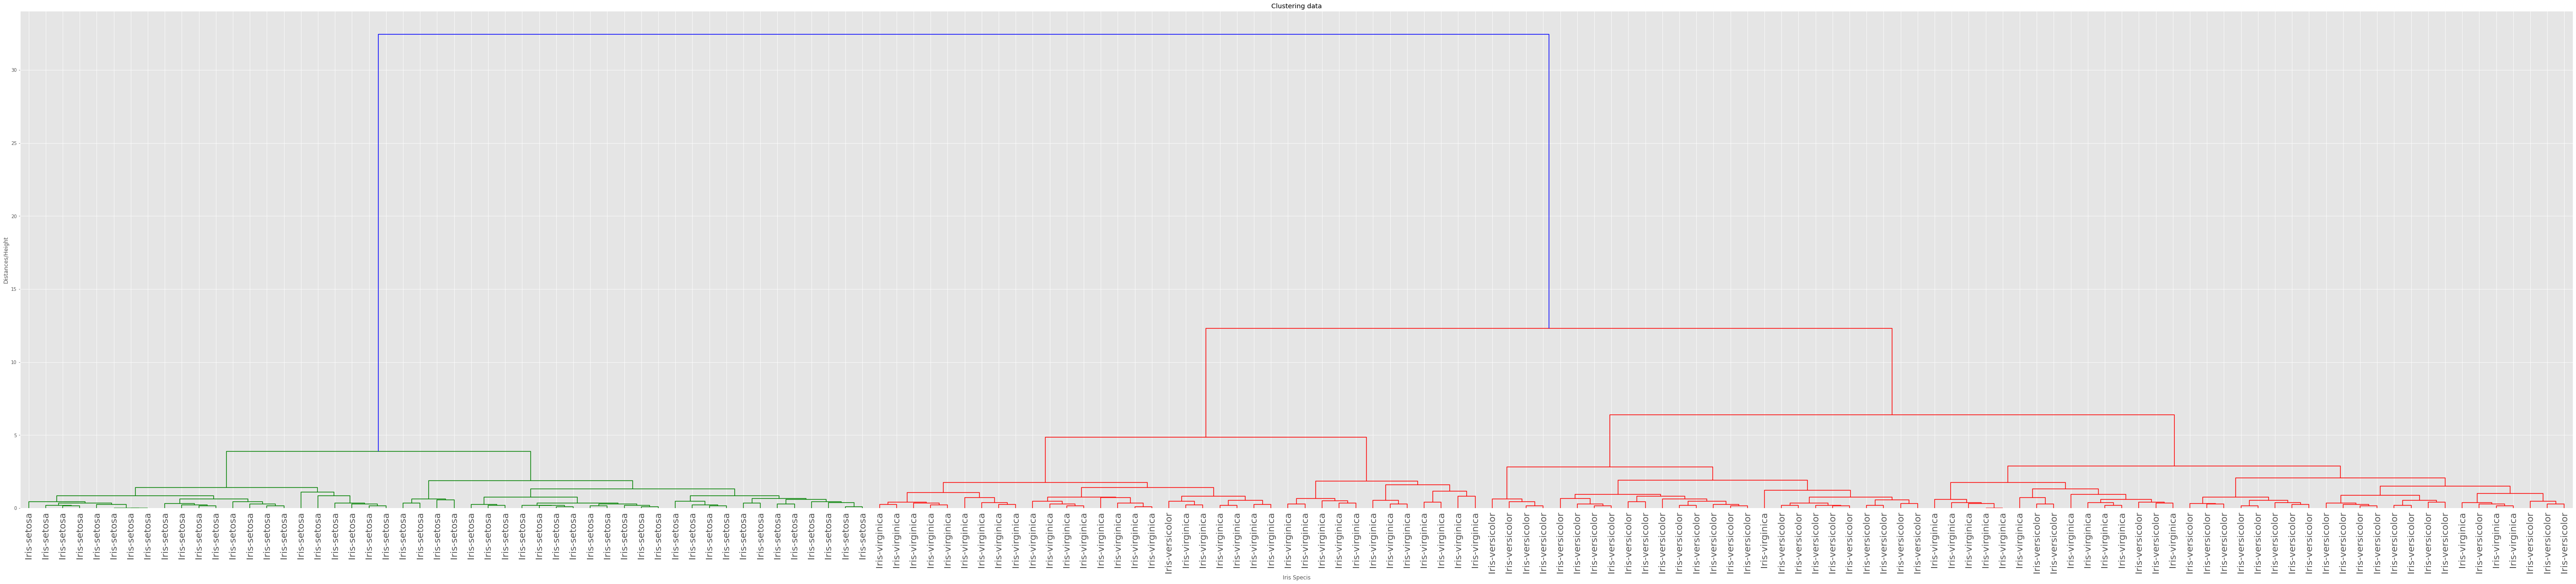

In [ ]:
plt.figure(figsize=(100, 20))
plt.title('Clustering data')
plt.xlabel('Iris Specis')
plt.ylabel('Distances/Height')
dendrogram(
    linkage_matrix,
    labels = df2.index,
    leaf_rotation = 90.,
    leaf_font_size = 20.,
)
# plt.savefig('dendrogram.png',transparent=True, dpi=90)
plt.show()